In [1]:
#Import Dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import censusdata
import csv

# Census API Key
from goober import (api_key) 

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [2]:
#Create an Empty List for Census DFs
census_data = []

#Query Census Wrapper for given years for parameters
for year in years:
    c = Census(api_key, year=year)
    data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E", "B19301_001E", "B17001_002E", "B17001_002E")
                       , {'for': 'County:*'})
    df= pd.DataFrame(data)
    df = df.rename(columns={"B01003_001E": "Population",
                            "B01002_001E": "Median Age",
                            "B19013_001E": "Household Income",
                            "B19301_001E": "Per Capita Income",
                            "B17001_002E": "Poverty Count",
                            "NAME": "Name", "zip code tabulation area": "Zipcode"})
    df["census_year"]= year
    census_data.append(df)

In [3]:
#Write Census Data into CSVs in Resources
for df in census_data:
    df.to_csv(f"./Resources/CensusByCounty/CountyCensus{df['census_year'][0]}.csv")

In [4]:
#Read in csv for school county data
schools = pd.read_csv('./Resources/ZipsCountiesForSchools.csv')

In [5]:
bottom10 = schools[['County in Census']][0:10].values.tolist()
top10 = schools[['County in Census']][10:20].values.tolist()

In [6]:
bottom10df = pd.DataFrame()
top10df = pd.DataFrame()

In [7]:
test = census_data[0]

In [8]:
#Top10
for df in census_data:
    for i in range(len(top10)):
        top10df = top10df.append(df[df['Name']==top10[i][0]])

In [9]:
#Bottom10
for df in census_data:
    for i in range(len(bottom10)):
        bottom10df = bottom10df.append(df[df['Name']==bottom10[i][0]])

In [10]:
top10df_indexed = top10df.set_index(['census_year','Name'])
bottom10df_indexed = bottom10df.set_index(['census_year','Name'])

In [17]:
top10df_indexed.head()

Median Age  Population  \
census_year Name                                                      
2009        Suffolk County, Massachusetts          32.5    730630.0   
            Tarrant County, Texas                  32.8   1704943.0   
            Hampshire County, Massachusetts        36.8    155160.0   
            Utah County, Utah                      23.2    504990.0   
            Leon County, Florida                   27.8    261023.0   

                                             Poverty Count  Household Income  \
census_year Name                                                               
2009        Suffolk County, Massachusetts         128504.0           51896.0   
            Tarrant County, Texas                 220369.0           54647.0   
            Hampshire County, Massachusetts        15281.0           57293.0   
            Utah County, Utah                      64693.0           56752.0   
            Leon County, Florida                   53788.0           42889.0   

                                             Per Capita Income county state  
census_year Name                                                             
2009        Suffolk County, Massachusetts              31080.0    025    25  
            Tarrant County, Texas                      26957.0    439    48  
            Hampshire County, Massachusetts            27612.0    015    25  
            Utah County, Utah                          19125.0    049    49  
            Leon County, Florida                       25467.0    073    12

In [11]:
#2015 data did not include Washington, DC, so District of Columbia needed to be dropped to properly calcuate the difference.
top10delta_pcincome = top10df_indexed.loc[2015]['Per Capita Income'] - top10df_indexed.loc[2009]['Per Capita Income']
top10delta_pcincome = top10delta_pcincome.drop(labels = "District of Columbia")
bottom10delta_pcincome = bottom10df_indexed.loc[2015]['Per Capita Income'] - bottom10df_indexed.loc[2009]['Per Capita Income']
bottom10delta_pcincome = bottom10delta_pcincome.drop(labels = "District of Columbia")

In [18]:
#HH income calculated similarly to p.c. income
top10delta_hhincome = top10df_indexed.loc[2015]['Household Income'] - top10df_indexed.loc[2009]['Household Income']
top10delta_hhincome = top10delta_hhincome.drop(labels = "District of Columbia")
bottom10delta_hhincome = bottom10df_indexed.loc[2015]['Household Income'] - bottom10df_indexed.loc[2009]['Household Income']
bottom10delta_hhincome = bottom10delta_hhincome.drop(labels = "District of Columbia")

In [28]:
#Population information also
top10delta_pop = 100 * (top10df_indexed.loc[2015]['Population'] - top10df_indexed.loc[2009]['Population'])/top10df_indexed.loc[2009]['Population']
top10delta_pop = top10delta_pop.drop(labels = "District of Columbia")
bottom10delta_pop = 100 * (bottom10df_indexed.loc[2015]['Population'] - bottom10df_indexed.loc[2009]['Population'])/bottom10df_indexed.loc[2009]['Population']
bottom10delta_pop = bottom10delta_pop.drop(labels = "District of Columbia")

In [39]:
#Poverty Rate (%) information also
top10delta_pov = ((top10df_indexed.loc[2015]['Poverty Count']/top10df_indexed.loc[2015]['Population'])*100 - 
                  (top10df_indexed.loc[2009]['Poverty Count'])/top10df_indexed.loc[2009]['Population']*100)
top10delta_pov = top10delta_pov.drop(labels = "District of Columbia")

bottom10delta_pov = ((bottom10df_indexed.loc[2015]['Poverty Count']/bottom10df_indexed.loc[2015]['Population'])*100 - 
                        (bottom10df_indexed.loc[2009]['Poverty Count'])/bottom10df_indexed.loc[2009]['Population']*100)
bottom10delta_pov = bottom10delta_pov.drop(labels = "District of Columbia")

In [30]:
top10df_indexed.loc[2015]

,Median Age,Population,Poverty Count,Household Income,Per Capita Income,county,state
Name,,,,,,,
"Suffolk County, Massachusetts",32.2,758919.0,148278.0,55044.0,34420.0,025,25
"Tarrant County, Texas",34.0,1914526.0,283264.0,58711.0,29058.0,439,48
"Hampshire County, Massachusetts",35.9,160759.0,20317.0,61368.0,30244.0,015,25
"Utah County, Utah",24.4,551957.0,71110.0,62180.0,21335.0,049,49
"Leon County, Florida",30.0,282940.0,60286.0,46745.0,26522.0,073,12
"Hampshire County, Massachusetts",35.9,160759.0,20317.0,61368.0,30244.0,015,25
"Erie County, New York",40.4,921584.0,134715.0,51247.0,28879.0,029,36
"Worcester County, Massachusetts",39.8,810935.0,92288.0,65313.0,32284.0,027,25
"Philadelphia County, Pennsylvania",33.7,1555072.0,399352.0,38253.0,22919.0,101,42


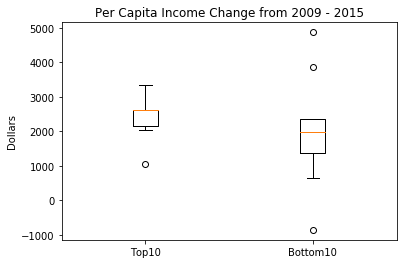

In [12]:
#Boxplot for PC Income
data = [top10delta_pcincome, bottom10delta_pcincome]
plt.boxplot(data)
plt.xticks([1, 2], ['Top10', 'Bottom10'])
plt.ylabel('Dollars')
plt.title('Per Capita Income Change from 2009 - 2015')

plt.savefig("./Images/PCIncomeChange")

plt.show()

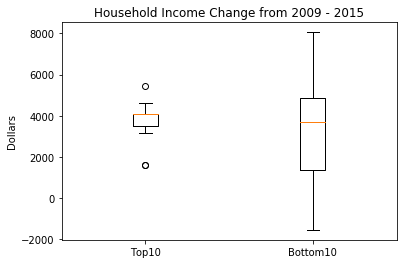

In [19]:
#Boxplot for HH income
data = [top10delta_hhincome, bottom10delta_hhincome]
plt.boxplot(data)
plt.xticks([1, 2], ['Top10', 'Bottom10'])
plt.ylabel('Dollars')
plt.title('Household Income Change from 2009 - 2015')

plt.savefig("./Images/HHIncomeChange")

plt.show()

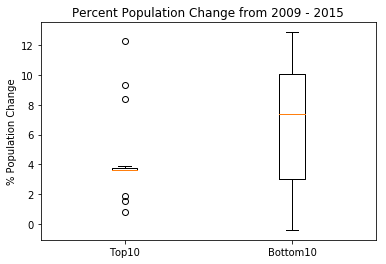

In [34]:
#Population Data boxplot
data = [top10delta_pop, bottom10delta_pop]
plt.boxplot(data)
plt.xticks([1, 2], ['Top10', 'Bottom10'])
plt.ylabel('% Population Change')
plt.title('Percent Population Change from 2009 - 2015')

plt.savefig("./Images/PopChange")

plt.show()

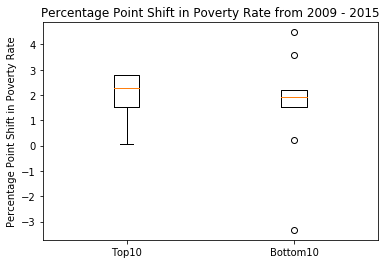

In [40]:
#Population Data boxplot
data = [top10delta_pov, bottom10delta_pov]
plt.boxplot(data)
plt.xticks([1, 2], ['Top10', 'Bottom10'])
plt.ylabel('Percentage Point Shift in Poverty Rate')
plt.title('Percentage Point Shift in Poverty Rate from 2009 - 2015')

plt.savefig("./Images/PovertyRateChange")

plt.show()

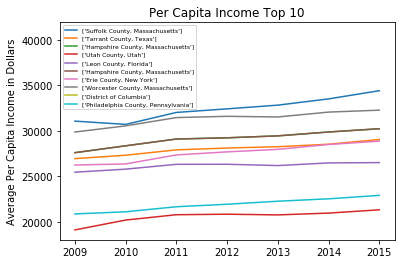

In [51]:
for city in top10:
    plt.plot(top10df[top10df['Name']==city[0]]['census_year'],
             top10df[top10df['Name']==city[0]]['Per Capita Income'])


plt.legend(top10,prop={'size': 6})
plt.title('Per Capita Income Top 10')
plt.ylabel('Average Per Capita Income in Dollars')

plt.savefig("./Images/linePCincomeTop10")

plt.show()

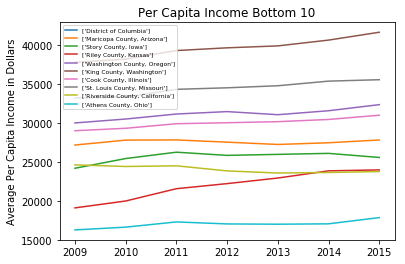

In [52]:
for city in bottom10:
    plt.plot(bottom10df[bottom10df['Name']==city[0]]['census_year'],
             bottom10df[bottom10df['Name']==city[0]]['Per Capita Income'])

plt.legend(bottom10,prop={'size': 6},loc=2)

plt.title('Per Capita Income Bottom 10')
plt.ylabel('Average Per Capita Income in Dollars')

plt.savefig('./Images/linePCincomeBottom10')

plt.show()

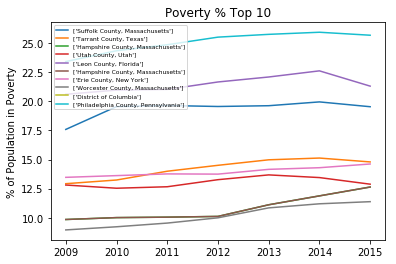

In [53]:
for city in top10:
    plt.plot(top10df[top10df['Name']==city[0]]['census_year'],
             100*(top10df[top10df['Name']==city[0]]['Poverty Count']/
             top10df[top10df['Name']==city[0]]['Population']))


plt.legend(top10,prop={'size': 6})
plt.title('Poverty % Top 10')
plt.ylabel('% of Population in Poverty')

plt.savefig('./Images/linePovTop10')

plt.show()

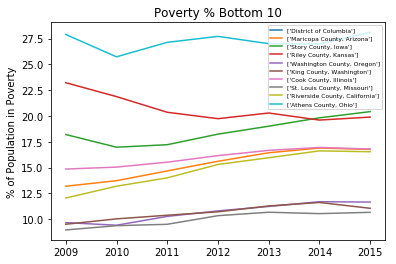

In [54]:
for city in bottom10:
    plt.plot(bottom10df[bottom10df['Name']==city[0]]['census_year'],
             100*(bottom10df[bottom10df['Name']==city[0]]['Poverty Count']/
             bottom10df[bottom10df['Name']==city[0]]['Population']))


plt.legend(bottom10,prop={'size': 6})
plt.title('Poverty % Bottom 10')
plt.ylabel('% of Population in Poverty')

plt.savefig('./Images/linePovBottom10')

plt.show()